In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# 사진 속에서 얼굴을 탐지하는 face_detector 모델
facenet = cv2.dnn.readNet('models/deploy.prototxt','models/res10_300x300_ssd_iter_140000.caffemodel')

# 얼굴인식 후 마스크 착용 여부를 확인하는 모델
model = load_model('models/mask_detector.model')

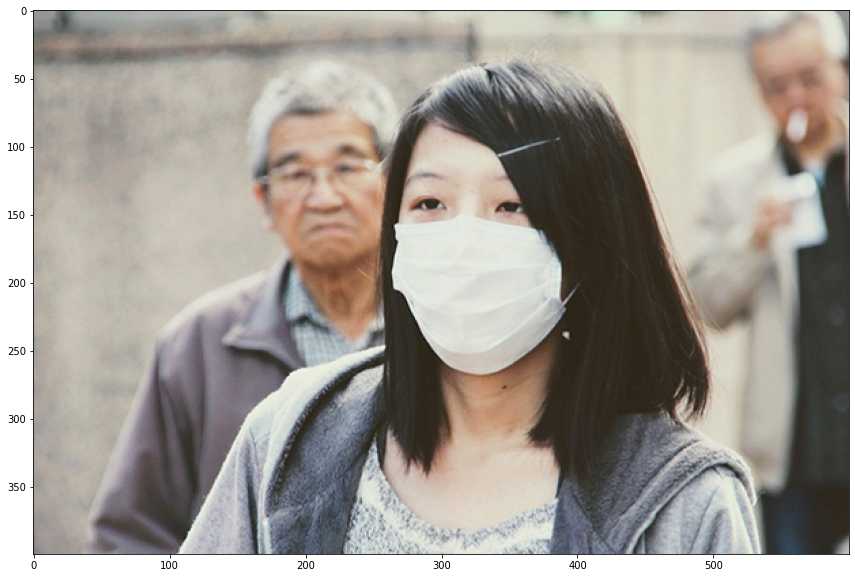

In [4]:
img = cv2.imread('examples/example_02.png')
h,w = img.shape[:2]
plt.figure(figsize=(16,10))
plt.imshow(img[:,:,::-1]) # BGR -> RGB 변환

In [8]:
blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(300, 300), mean=
	(104.0, 177.0, 123.0))
facenet.setInput(blob) # 모델에 들어가는 input
detections = facenet.forward() # 결과를 inference

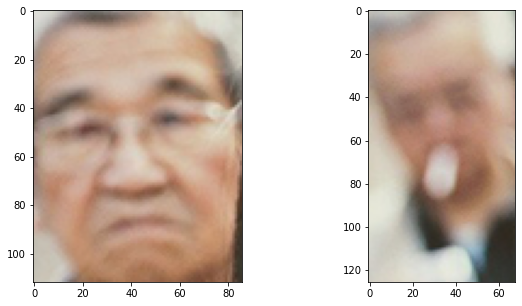

In [9]:
faces = []

# 사진속 얼굴 개수가 여러 개 있을 수 있으니 반복문 사용
for i in range(detections.shape[2]):
  confidence = detections[0,0,i,2]

  if confidence < 0.5:
    continue
  else:
     x1 = int(detections[0,0,i,3] * w)
     y1 = int(detections[0,0,i,4] * h)
     x2 = int(detections[0,0,i,5] * w)
     y2 = int(detections[0,0,i,6] * h)

     face = img[y1:y2, x1:x2]
     faces.append(face)

plt.figure(figsize=(10,5))

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])

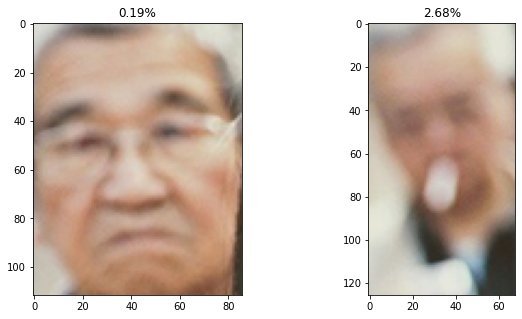

In [10]:
plt.figure(figsize=(10,5))

for i, face in enumerate(faces):
    face_input = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face_input = cv2.resize(face_input, dsize=(224, 224))
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)

    (mask, nomask) = model.predict(face_input)[0]

    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])
    plt.title('%.2f%%' % (mask * 100))